## Oscillations, Waves, and Optics: Question 15
A plane wave of unit amplitude, $\exp(\mathrm i\omega t − \mathrm ik_1 x)$ propagates in the $+x$ direction of a region of impedance $Z_1$ which fills the region $x < 0$. It is incident normally on a layer of material of thickness $l$ and impedance $Z_2$ which fills the region $0 < x < l$. Some of it is in general reflected, so that the total disturbance in $x < 0$ is
$$
\psi_1 = \exp(\mathrm i\omega t − \mathrm ik_1x) + r \exp(\mathrm i\omega t + \mathrm ik_1x),
$$
where $r$ is the complex amplitude of the reflected wave. In steady state, region 2 in general contains forward and backward travelling waves of complex amplitudes $a$ and $b$:
$$
\psi_2 = a \exp(\mathrm i\omega t − \mathrm ik_2x) + b \exp(\mathrm i\omega t + \mathrm ik_2x),
$$
The layer lies on an infinite substrate of impedance $Z_3$, which fills the region $x > l$. In this region, the
transmitted wave can be written
$$
\psi_3 = \tau \exp[\mathrm i\omega t − \mathrm ik_3(x-l)],
$$
for some complex transmitted amplitude $\tau$ . Note that $k_1$, $k_2$, $k_3$ are the wavenumbers in the three
regions.

Show that the boundary conditions at $x = 0$ and $x = l$ can be written in the form
$$
\begin{pmatrix}
    -1 & 1 & 1 & 0 \\
    1 & Z_1/Z_2 & -Z_1/Z_2 & 0 \\
    0 & \mathrm e^{-\mathrm ik_2l} & \mathrm e^{\mathrm ik_2l} & -1 \\
    0 & \mathrm e^{-\mathrm ik_1l} & -\mathrm e^{\mathrm ik_1l} & -Z_2/Z_3
\end{pmatrix}
\begin{pmatrix}
    r \\ a \\ b \\ \tau
\end{pmatrix}
=
\begin{pmatrix}
    1 \\ 1 \\ 0 \\ 0
\end{pmatrix}.
$$

The first two lines are the continuous condition of position and velocity at $x=0$, the following two lines are the continuous condition of position and velocity at $x=l$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Using Python (or another language, perhaps MATLAB), write a function which solves this matrix equation, taking as arguments the values $Z_1$, $Z_2$, $Z_3$, $k_2$ and $l$, and returning the vector of complex amplitudes $(r, a, b, \tau )$. Hence plot the amplitude and phase of the reflection (r) and transmission (t) coefficients as a function of thickness $l$ in the range $0$ to $1\ {\rm m}$ for the cases:

+ $k_2=2\pi\ {\rm m^{-1}}$, $Z_1=1\ {\rm \Omega}$, $Z_2=2\ {\rm \Omega}$, $Z_3=4\ {\rm \Omega}$.
+ $k_2=2\pi\ {\rm m^{-1}}$, $Z_1=1\ {\rm \Omega}$, $Z_2=3\ {\rm \Omega}$, $Z_3=4\ {\rm \Omega}$.

To get the correct form of the equations, assume that for this wave system, for a wave of amplitude $\psi$, the quantities $\psi$ and $\psi/Z$ are continuous ($Z$ is the impedance). Recall that the impedance for a wave traveling in the negative direction is $−Z$. The continuity equations at $x = 0$ are then $(1 + r) = (a + b)$ and $(1 − r)/Z_1 = (a − b)/Z_2$. You may use the numpy.linalg.solve routine to solve the matrix equation. 

In [2]:
def solve_coeffients(k_2, z_1, z_2, z_3):
    '''
    This function solves the reflection and transmission coefficients for a given set of constants.

    Inputs:
    k_2: float, the wave number in the second medium.
    z_1: float, the characteristic impedance in the first medium.
    z_2: float, the characteristic impedance in the second medium.
    z_3: float, the characteristic impedance in the third medium.

    Outputs:
    r: list, the reflection coefficients, r[i] is the reflection coefficient at length i.
    a: list, the transmission coefficients, a[i] is the transmission coefficient at length i.
    b: list, the transmission coefficients, b[i] is the transmission coefficient at length i.
    tau: list, the transmission coefficients, tau[i] is the transmission coefficient at length i.
    lengths: list, the lengths of region 2 at which the coefficients are calculated.
    '''
    # Define the constants:
    lengths = np.linspace(0, 1, 100) # in m
    j = complex(0, 1)

    r = []
    a = []
    b = []
    tau = []

    # Suppose the matrix equation is Mx=y, where M is a 4x4 matrix and x and y are 4x1 vectors.
    # Give the vector y:
    y = np.array([1, 1, 0, 0])

    for l in tqdm(lengths):
        # Define the matrix M using the constants above:
        M = np.array([[-1, 1, 1, 0],
                    [1, z_1/z_2, -z_1/z_2, 0],
                    [0, np.exp(-j*k_2*l), np.exp(j*k_2*l), -1],
                    [0, np.exp(-j*k_2*l), -np.exp(j*k_2*l), -z_2/z_3]])
        
        # Solve the vector x from the matrix equation:
        x = np.linalg.solve(M, y)
        
        # Append the coefficients to the lists:
        r.append(x[0])
        a.append(x[1])
        b.append(x[2])
        tau.append(x[3])
    return r, a, b, tau, lengths

In [3]:
def plot_coefficients(lengths, r, tau):
    # the amplitude of the reflection coefficient
    amp_r = np.abs(r)
    # the phase of the reflection coefficient
    phase_r = np.angle(r)
    # the amplitude of the transmission coefficient
    amp_t = np.abs(tau)
    # the phase of the transmission coefficient
    phase_t = np.angle(tau)

    ### plot the amplitude and phase of the reflection (r) and transmission (t) coefficients
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.title(r'Modulus of the reflection and transmission coeffients')
    plt.plot(lengths, amp_r, color = 'royalblue', label = r'$\vert r\vert$')
    plt.plot(lengths, amp_t, color = 'orange', label = r'$\vert t\vert$')
    plt.xlim(0, 1)
    plt.ylim(0, 2)
    plt.xlabel(r'Length [m]')
    plt.ylabel(r'Modulus')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title(r'Phase of the reflection and transmission coeffients')
    plt.plot(lengths, phase_r / np.pi, color = 'royalblue', label = r'$\arg(r)$')
    plt.plot(lengths, phase_t / np.pi, color = 'orange', label = r'$\arg(t)$')
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.xlabel(r'Length [m]')
    plt.ylabel(r'$\arg(r)/\pi$')
    plt.legend()

    plt.tight_layout()
    plt.show()

100%|██████████| 100/100 [00:00<00:00, 19997.64it/s]


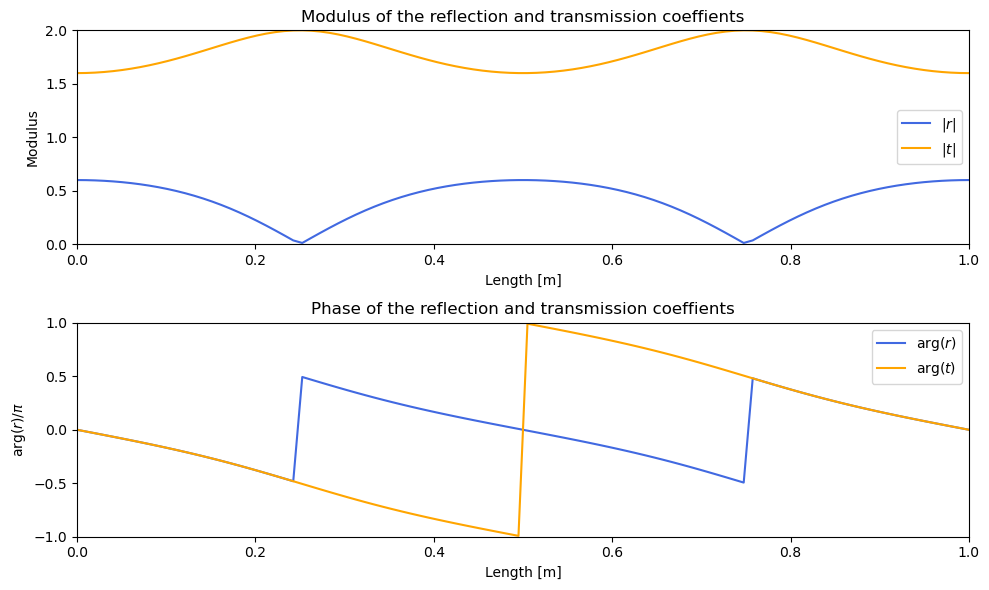

In [4]:
# For a given set of parameters: k_2, z_1, z_2, and z_3,
r1, a1, b1, tau1, lengths1 = solve_coeffients(2 * np.pi, 1, 2, 4)
plot_coefficients(lengths1, r1, tau1)

100%|██████████| 100/100 [00:00<00:00, 33346.35it/s]


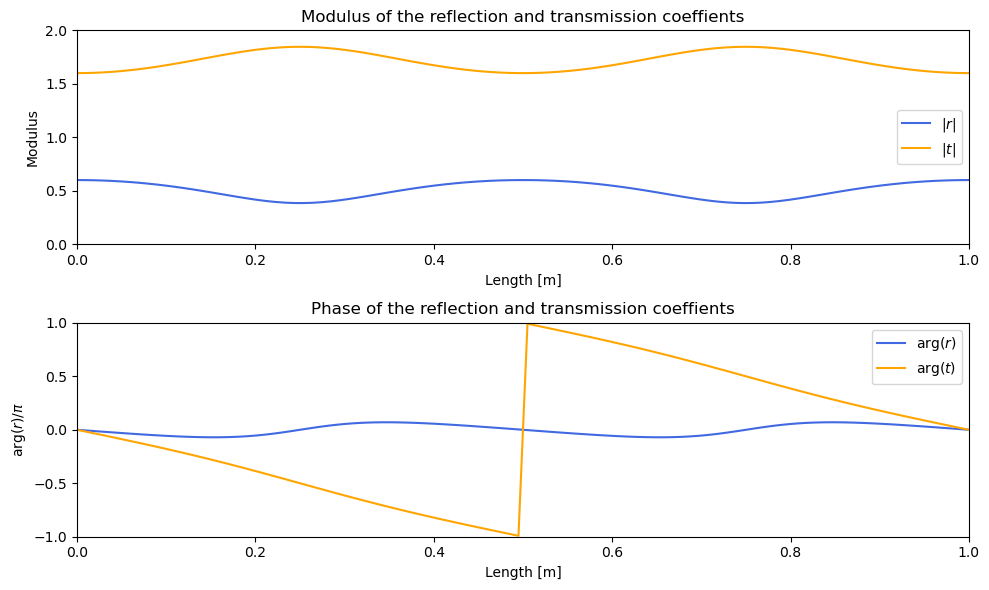

In [5]:
# For another set of parameters:
r2, a2, b2, tau2, lengths2 = solve_coeffients(2 * np.pi, 1, 3, 4)
plot_coefficients(lengths2, r2, tau2)